In [14]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
from my_utils.my_utils import printMD

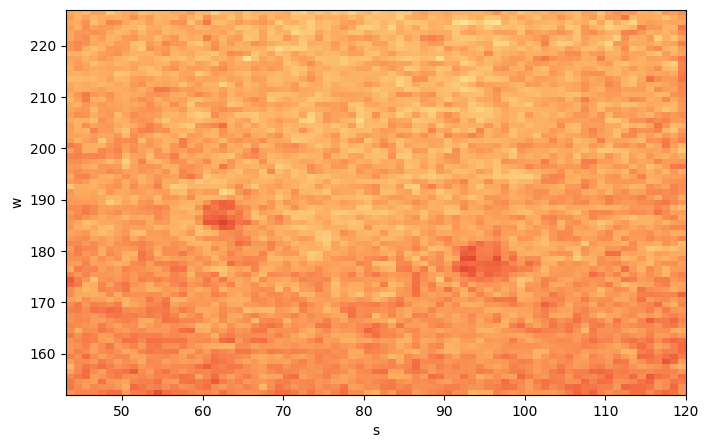

(73, 77)


In [50]:
file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, x, y = file["h7"].to_numpy()

degree_of_rotation = -2.2
wT_rotated = ndimage.rotate(w.T, degree_of_rotation, reshape=False)

fig, ax = plt.subplots(figsize=(8, 5))
mesh = ax.pcolormesh(range(len(x)), y, wT_rotated, cmap="RdYlBu", vmin=200, vmax=400)
ax.set_xlabel("s")
ax.set_ylabel("w")
# ax.set_ylim(2, 75)
ax.set_ylim(152, 227)
ax.set_xlim(43, 120)
# fig.colorbar(mesh)
# plt.grid()
plt.show()
print(wT_rotated[2:75, 43:120].shape)

## Whole picture + rotation to 2.2 degrees

In [3]:
degree_of_rotation = 2.2

file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()

w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T

y = range(w_new.shape[0])   # Rows
x = range(w_new.shape[1])   # Columns

print(w_new.shape)

(400, 124)


### Plotting

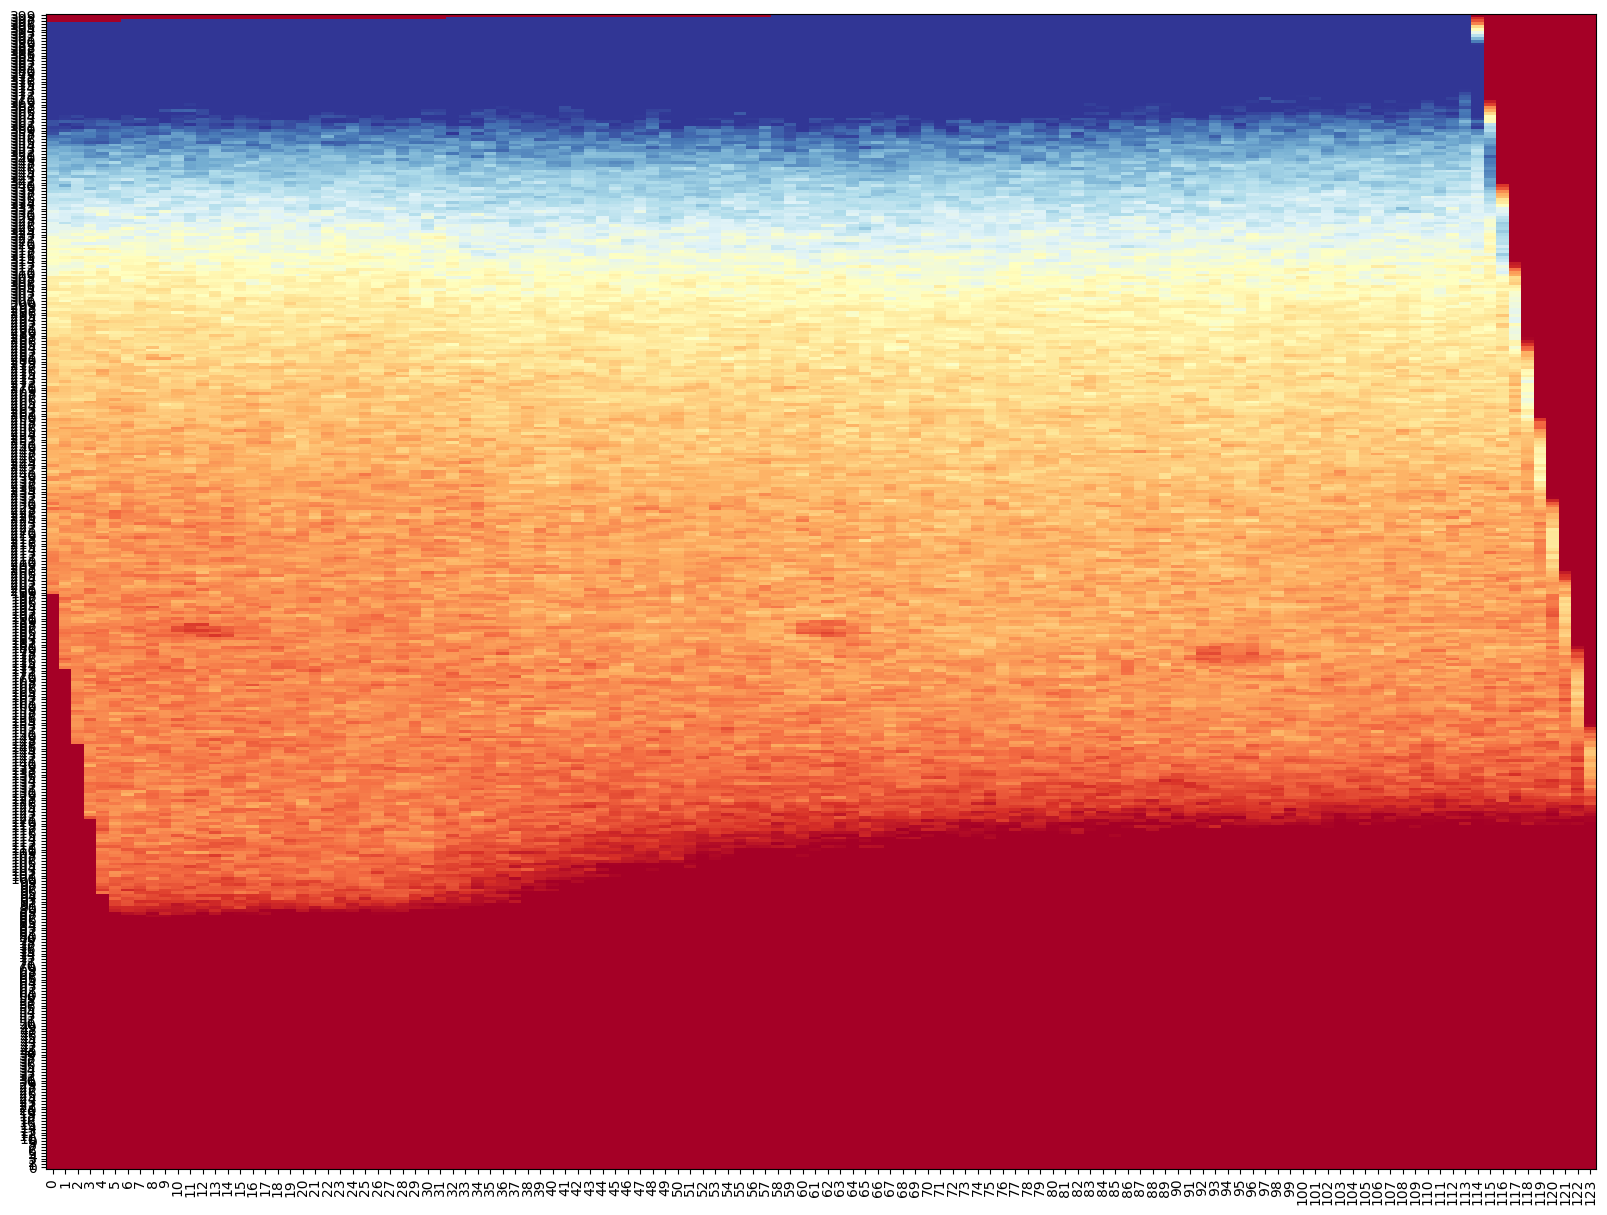

In [4]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.pcolormesh(x, y, w_new, cmap="RdYlBu", vmin=200, vmax=400)
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.show()

## Cropping 2 pictures of same size
1. With grade
2. With markers

### With tungsten grade

### **With tungsten grid**

Box shape in bins: (73, 74)


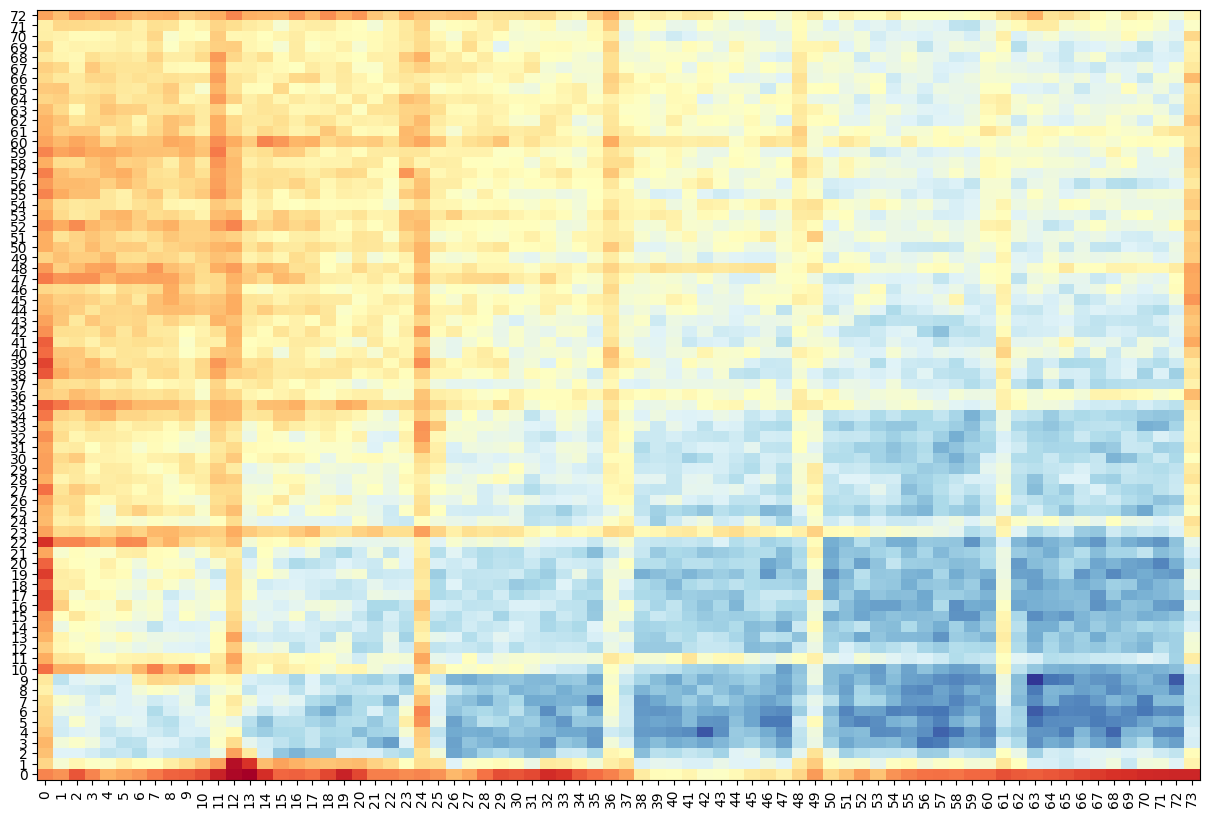

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
w_grade = w_new[2:75, 45:119]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu")
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **With tungsten grid**")
print("Box shape in bins:",w_grade.shape)
plt.show()

### With markers (no tungsten)

### **Markers (no grade)**

Box shape in bins: (73, 74)


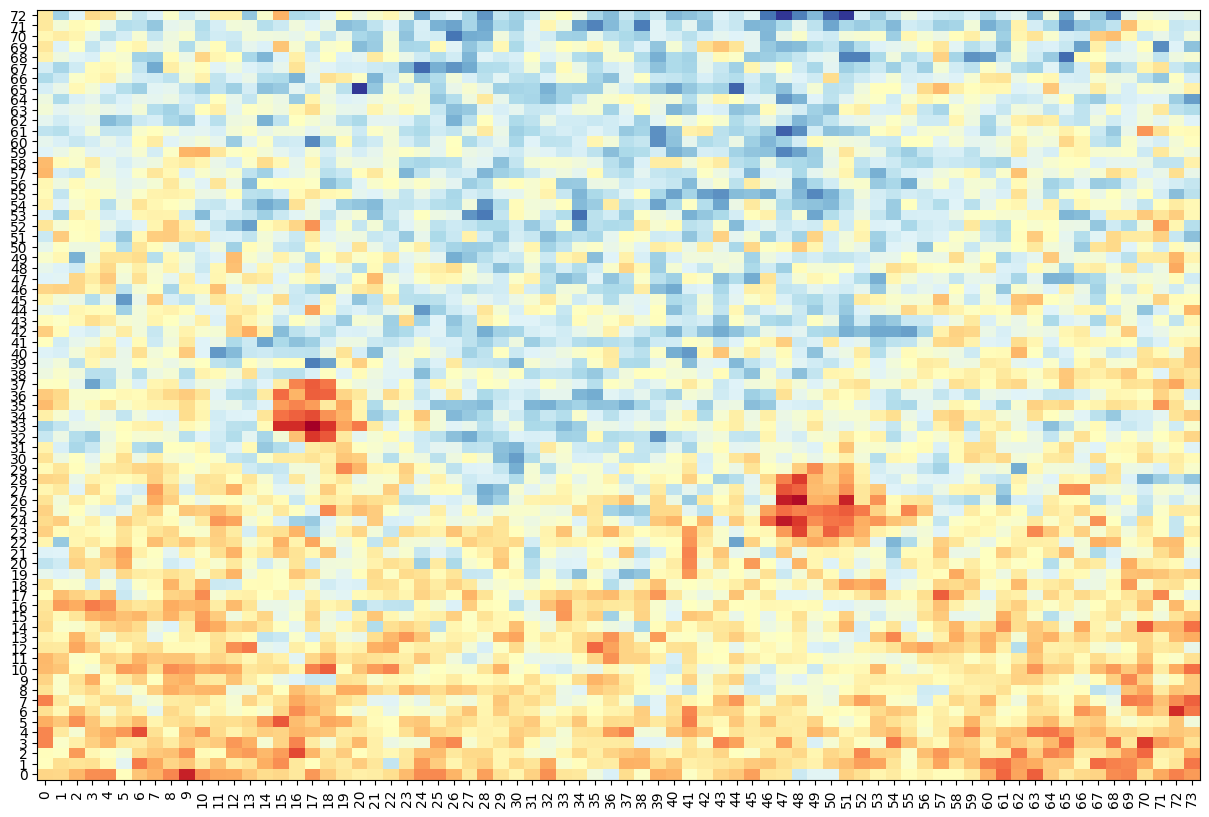

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
w_markers = w_new[152:225, 45:119]
y_markers = range(w_markers.shape[0])   # Rows
x_markers = range(w_markers.shape[1])   # Columns
ax.pcolormesh(x_markers, y_markers, w_markers, cmap="RdYlBu")
plt.xticks(x_markers, rotation=90)
plt.yticks(y_markers)
printMD("### **Markers (no grade)**")
print("Box shape in bins:",w_markers.shape)
plt.show()

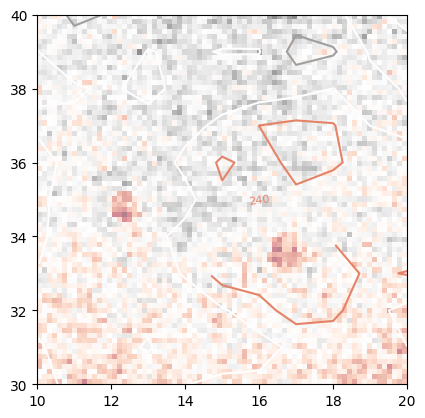

In [44]:
X = np.arange(w_markers.shape[1]) 
Y = np.arange(w_markers.shape[0]) 
Z = w_markers
# plt.contour(X, Y, Z, cmap='RdGy');
# plt.imshow(Z, extent=[0, 74, 0, 73], origin='lower',
#            cmap='RdGy')

contours = plt.contour(X, Y, Z, 3, cmap='RdGy')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[10, 20, 30, 40], origin='lower',
           cmap='RdGy', alpha=0.5)

## Making graphs

### **With tungsten grid**

Shape of summed matrix: (74,)


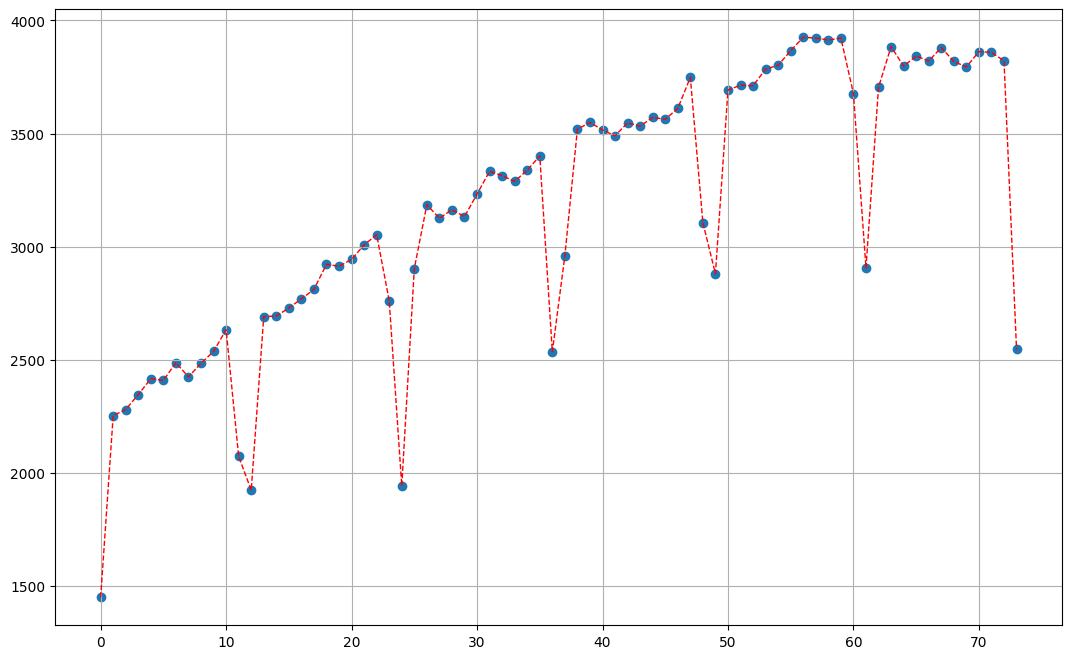

In [7]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_grade_summed = w_grade.sum(axis=_axis)
x_grade_summed = np.arange(len(w_grade_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_grade_summed, w_grade_summed)
ax.plot(x_grade_summed, w_grade_summed, '--', lw=1, c='r')
printMD("### **With tungsten grid**")
print("Shape of summed matrix:", w_grade_summed.shape)
plt.grid()
plt.show()

### **Markers no grid**

Shape of summed matrix: (74,)


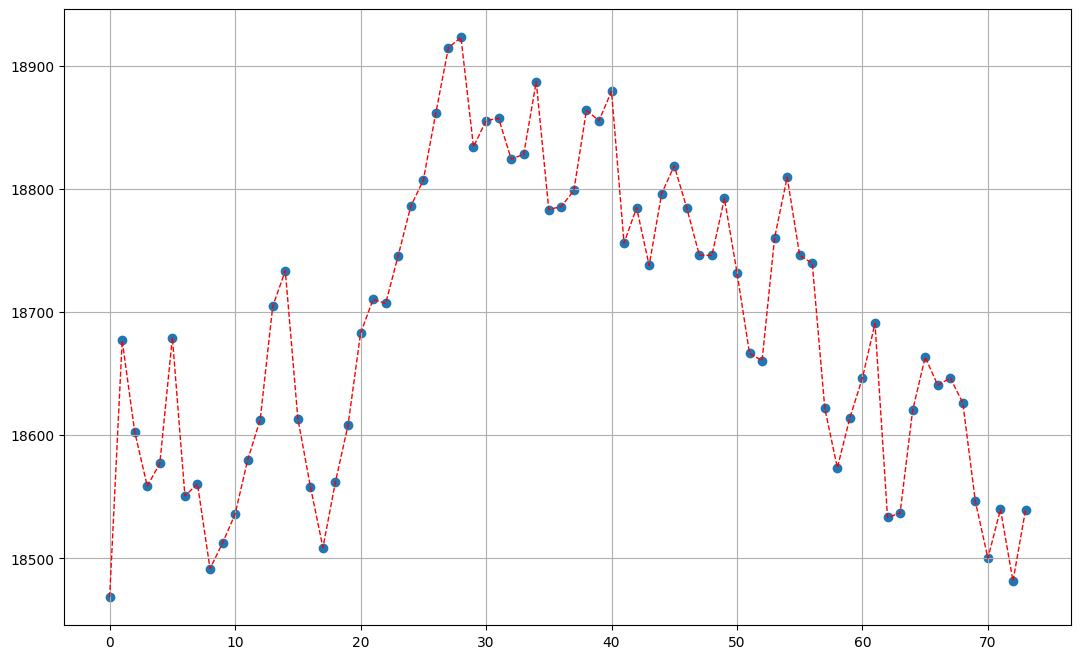

In [8]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **Markers no grid**")
print("Shape of summed matrix:", w_markers_summed.shape)
# ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
# s="""It appears to be, that using WHOLE box for making such kind of graph is quite a bad idea
# NOTHING is clear on this graph
# Going to use a strip of data""",
# fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

### **With tungsten grade**

Shape of summed matrix: (74,)


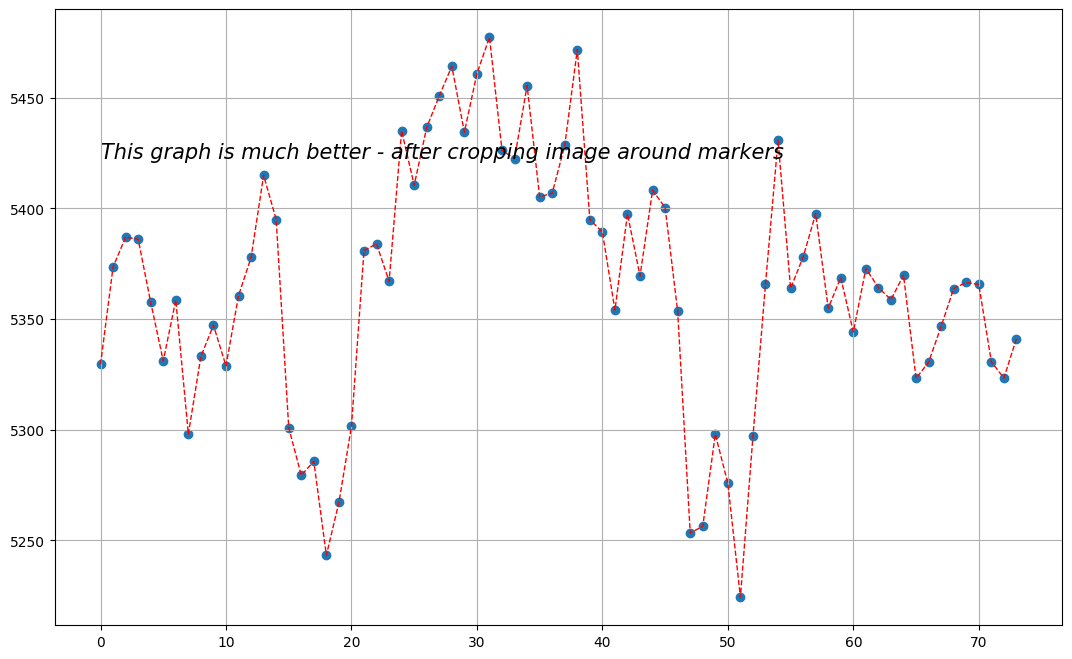

In [9]:
_axis = 0 # 0 - keeps x; 1 - keeps y
# Coordinates                   Y   X
w_markers_summed = w_markers[20:41, :].sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_markers_summed.shape)
ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
s="""This graph is much better - after cropping image around markers""",
fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

### **With tungsten grade**

Shape of summed matrix: (74,)


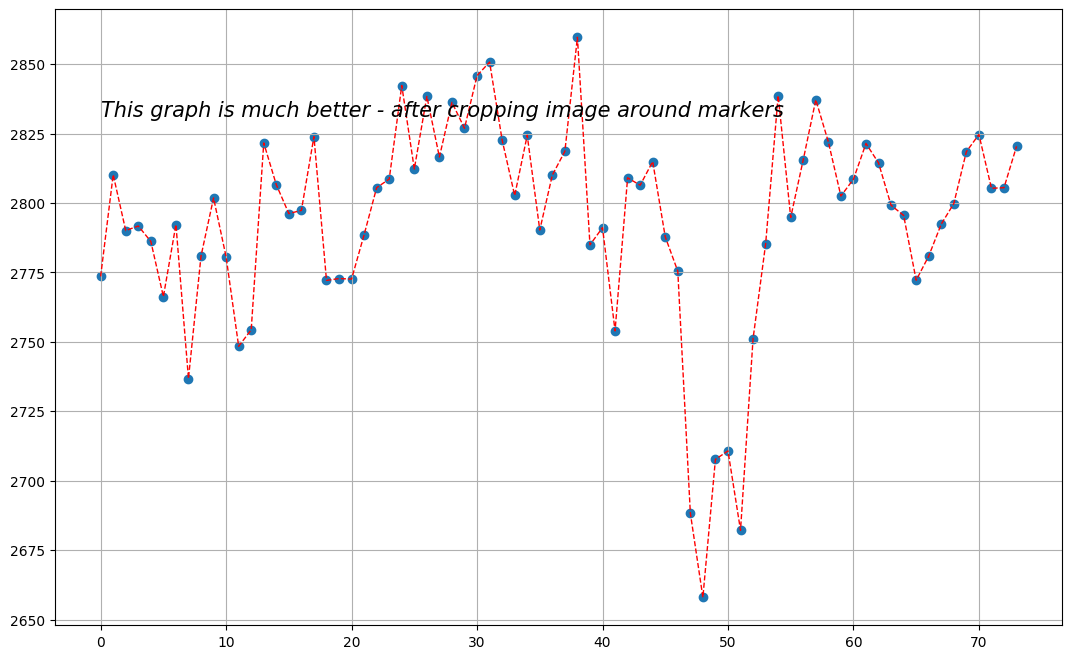

In [10]:
# w_new[172:193, 45:119]
_axis = 0 # 0 - keeps x; 1 - keeps y
# Coordinates               Y       X
# w_markers_summed = w_new[172:193, 27:-5].sum(axis=_axis)
w_markers_summed = w_new[172:183, 45:119].sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_markers_summed.shape)
ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
s="""This graph is much better - after cropping image around markers""",
fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

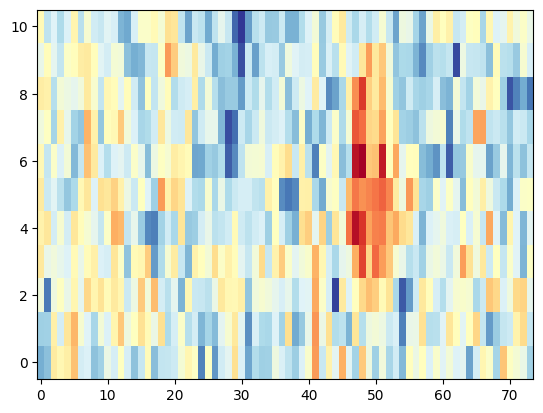

In [11]:
w_markers = w_new[172:183, 45:119]
y_markers = range(w_markers.shape[0])   # Rows
x_markers = range(w_markers.shape[1])   # Columns
plt.pcolormesh(x_markers, y_markers, w_markers, cmap="RdYlBu")

## Left Marker

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [  10.6344728   -71.31675575 2059.32557678]


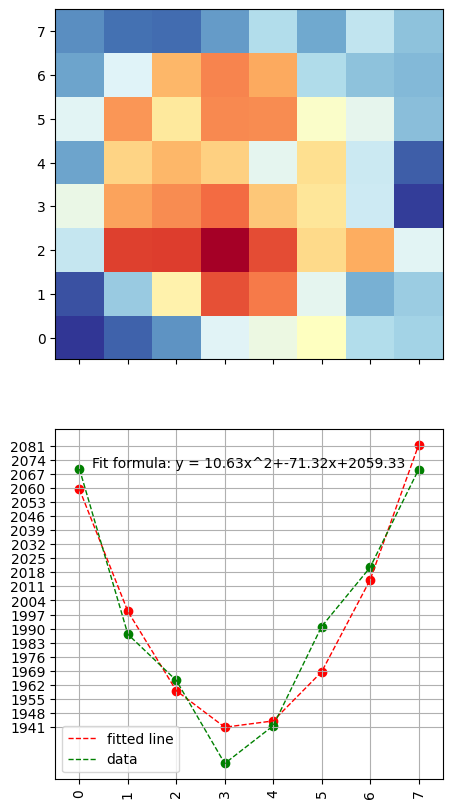

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 14:-52]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(0.25, 2070, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(y_pred.min(), y_pred.max(), 7))
plt.grid()
plt.show()

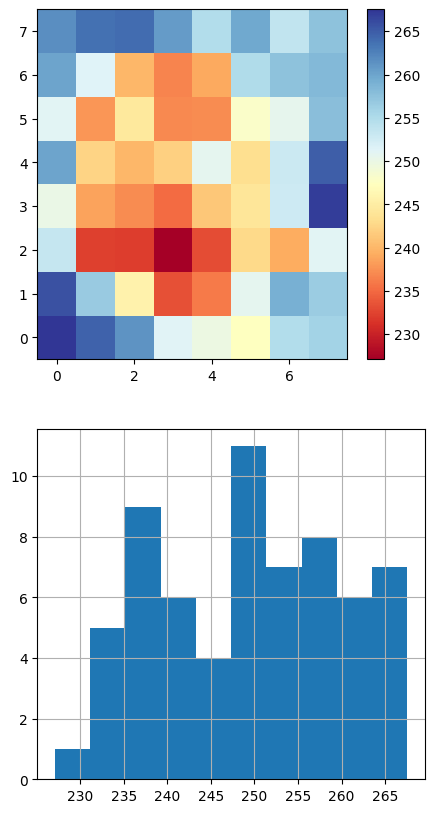

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_markers = w_new[152:225, 45:119]
w_left = w_markers[31:39, 14:-52]

# w_left = np.where(w_left<=trsh, w_left, w_left*1.5)
mesh = ax[0].pcolormesh(np.arange(w_left.shape[1]), np.arange(w_left.shape[0]), w_left, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_left.ravel(), bins=10)
plt.grid()

plt.show()

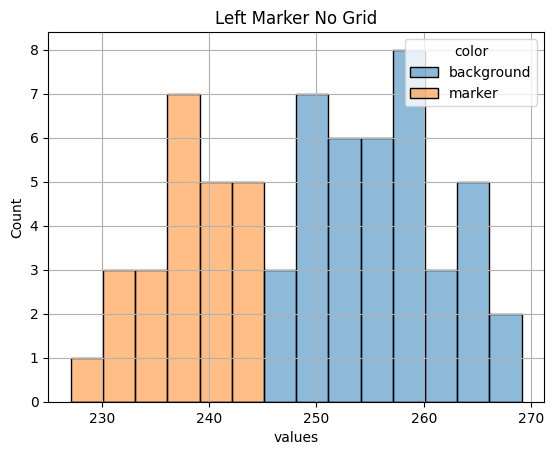

In [22]:

df_left = pd.DataFrame(w_left.ravel())
trsh = 245
df_left['color'] = np.where(df_left[0]<=trsh, "marker", "background")
df_left.rename(columns={0: "values"}, inplace=True)
sns.histplot(data=df_left, x="values", hue="color", binwidth=3)
plt.title("Left Marker No Grid")
plt.grid()
plt.show()

## Right Marker

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [ 6.40479558e-02 -3.48510678e+00  2.06304534e+03]


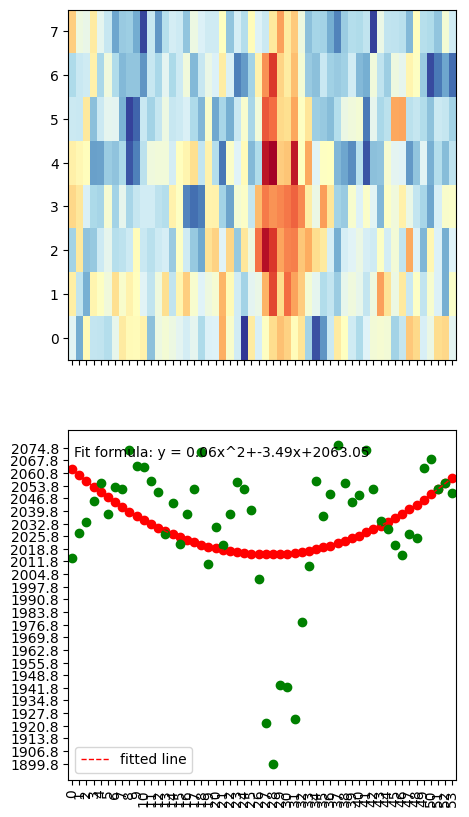

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[22:30, 20:75]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(0.25, 2070, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
# ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
# plt.grid()
plt.show()

### Right Marker Hist

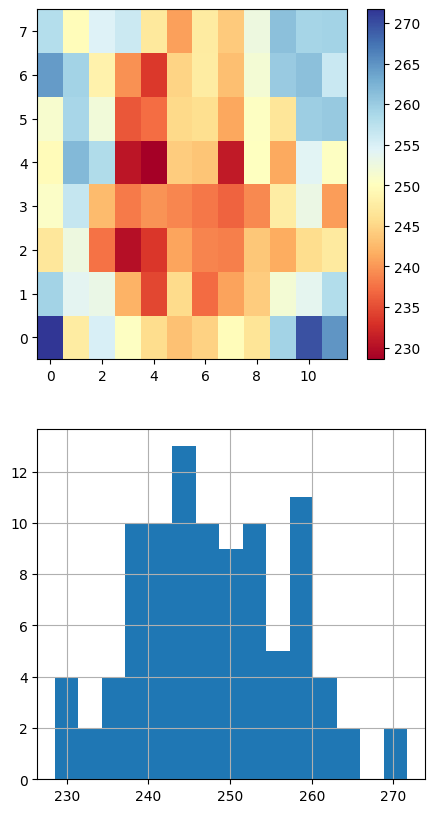

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_right = w_markers_cropped

mesh = ax[0].pcolormesh(np.arange(w_right.shape[1]), np.arange(w_right.shape[0]), w_right, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_right.ravel(), bins=15)
plt.grid()

plt.show()

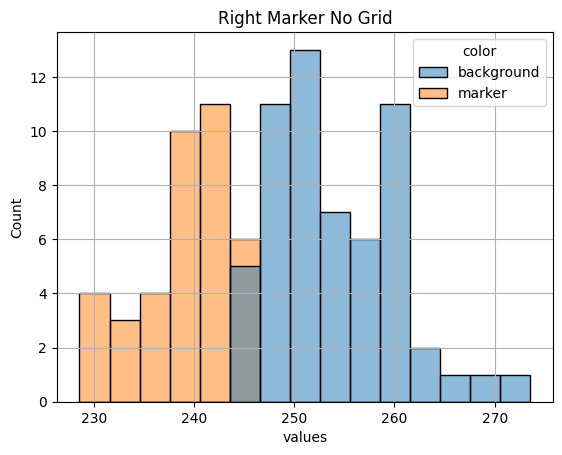

In [29]:

df_right = pd.DataFrame(w_right.ravel())
trsh = 245
df_right['color'] = np.where(df_right[0]<=trsh, "marker", "background")
df_right.rename(columns={0: "values"}, inplace=True)
sns.histplot(data=df_right, x="values", hue="color", binwidth=3)
plt.title("Right Marker No Grid")
plt.grid()
plt.show()

## Looking at Grid

### **Right bottom marker with tungsten grid**

Box shape in bins: (8, 12)


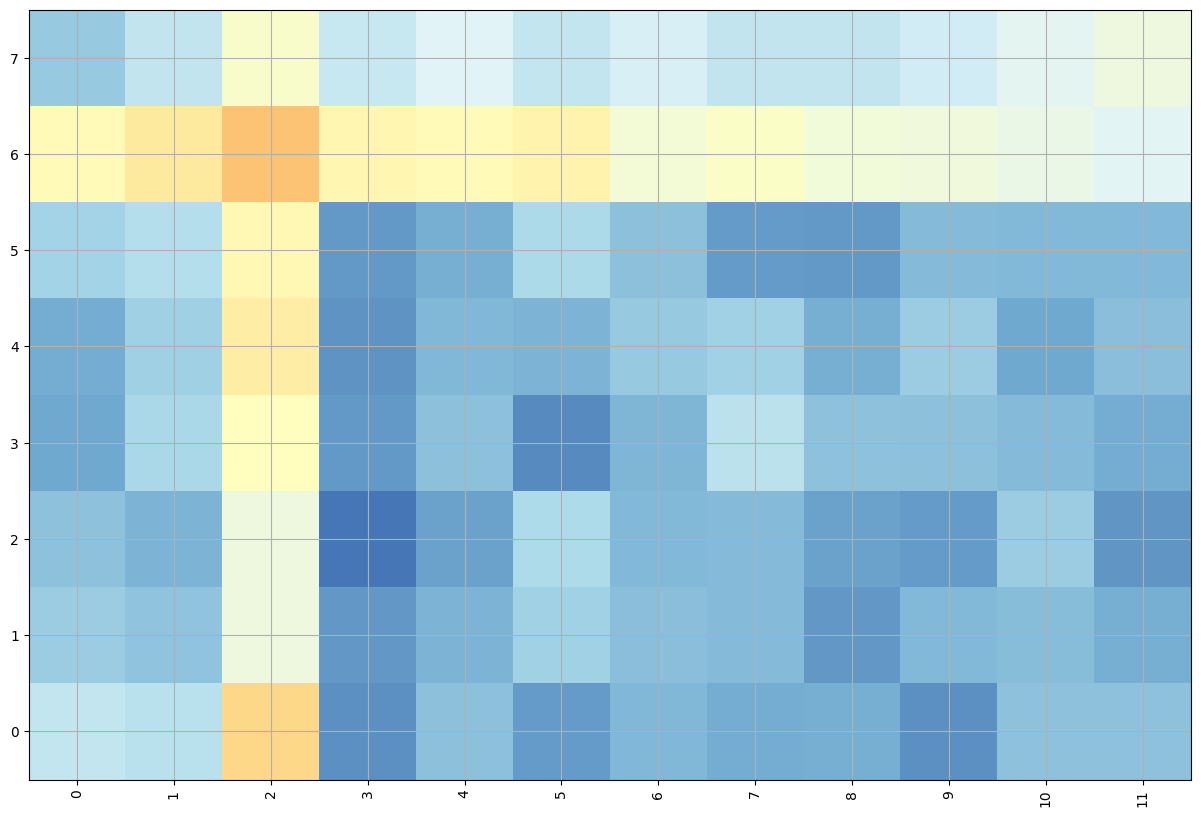

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
#                 Y     X
w_grade = w_new[19:27, 92:104]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu", vmin=0, vmax=80)
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **Right bottom marker with tungsten grid**")
print("Box shape in bins:",w_grade.shape)
plt.grid()
plt.show()

[-3.66776084e-01  9.33319166e+00  4.14196416e+02]


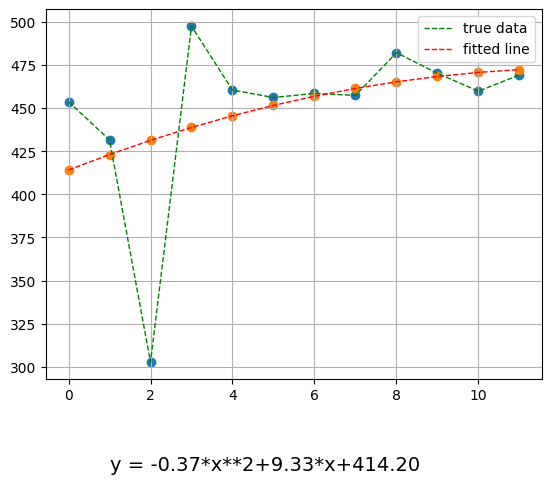

In [60]:
w_markers_cropped = w_grade
w_markers_summed = w_markers_cropped.sum(axis=0)
#define data
y = w_markers_summed
x = np.arange(len(y))
#find line of best fit
z = np.polyfit(x, y, 2, full=False, cov=False)

#add points to plot
plt.scatter(x, y)
plt.plot(x, y, '--', lw=1, c='green', label='true data')
print(z)
#add line of best fit to plot
# plt.plot(x, a*x+b) 
y_pred = z[0]*x**2+z[1]*x+z[-1]
plt.scatter(x, y_pred)
plt.plot(x, y_pred, '--', lw=1, c='r', label='fitted line')
plt.text(1, 240, f'y = {z[0]:.2f}*x**2+{z[1]:.2f}*x+{z[-1]:.2f}', size=14)
plt.legend()
plt.grid()
plt.show()

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [-3.66776084e-01  9.33319166e+00  4.14196416e+02]


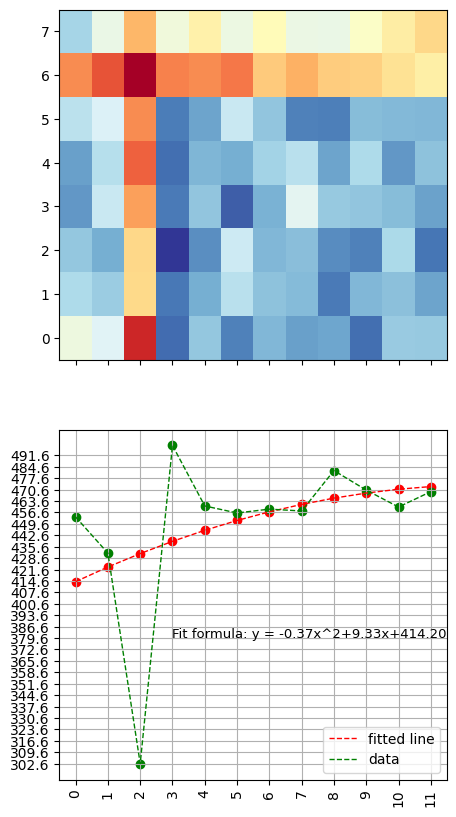

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_grade
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(3, 380, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=9.5, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.grid()
plt.show()

### Histogram of all data

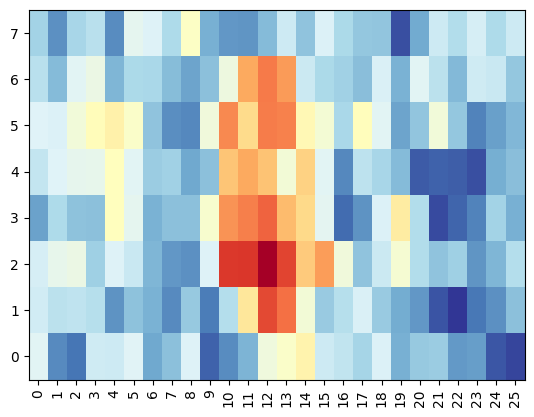

In [39]:
# # Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 5:-43]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

# w_onebin = w_markers[35:39, 5:-43]
# x_onebin = range(w_onebin.shape[1])     # Columns   (_, this)
# y_onebin = range(w_onebin.shape[0])     # Rows      (this, _)
  
plt.pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)
plt.show()

(array([1., 2., 4., 4., 1., 3., 3., 4., 1., 3.]),
 array([247.38386536, 249.61682129, 251.84979248, 254.08276367,
        256.31573486, 258.54867554, 260.78164673, 263.01461792,
        265.24755859, 267.48052979, 269.71350098]),
 <BarContainer object of 10 artists>)

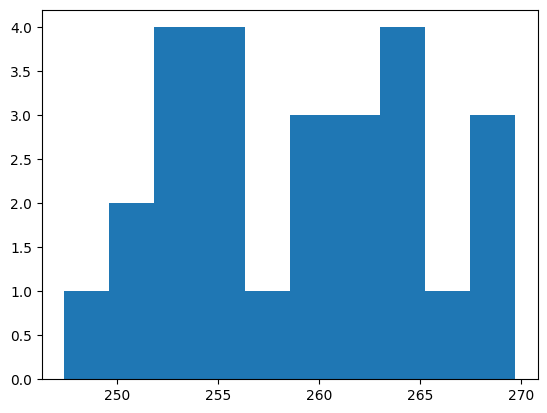

In [41]:
plt.hist(w_markers_cropped[0])

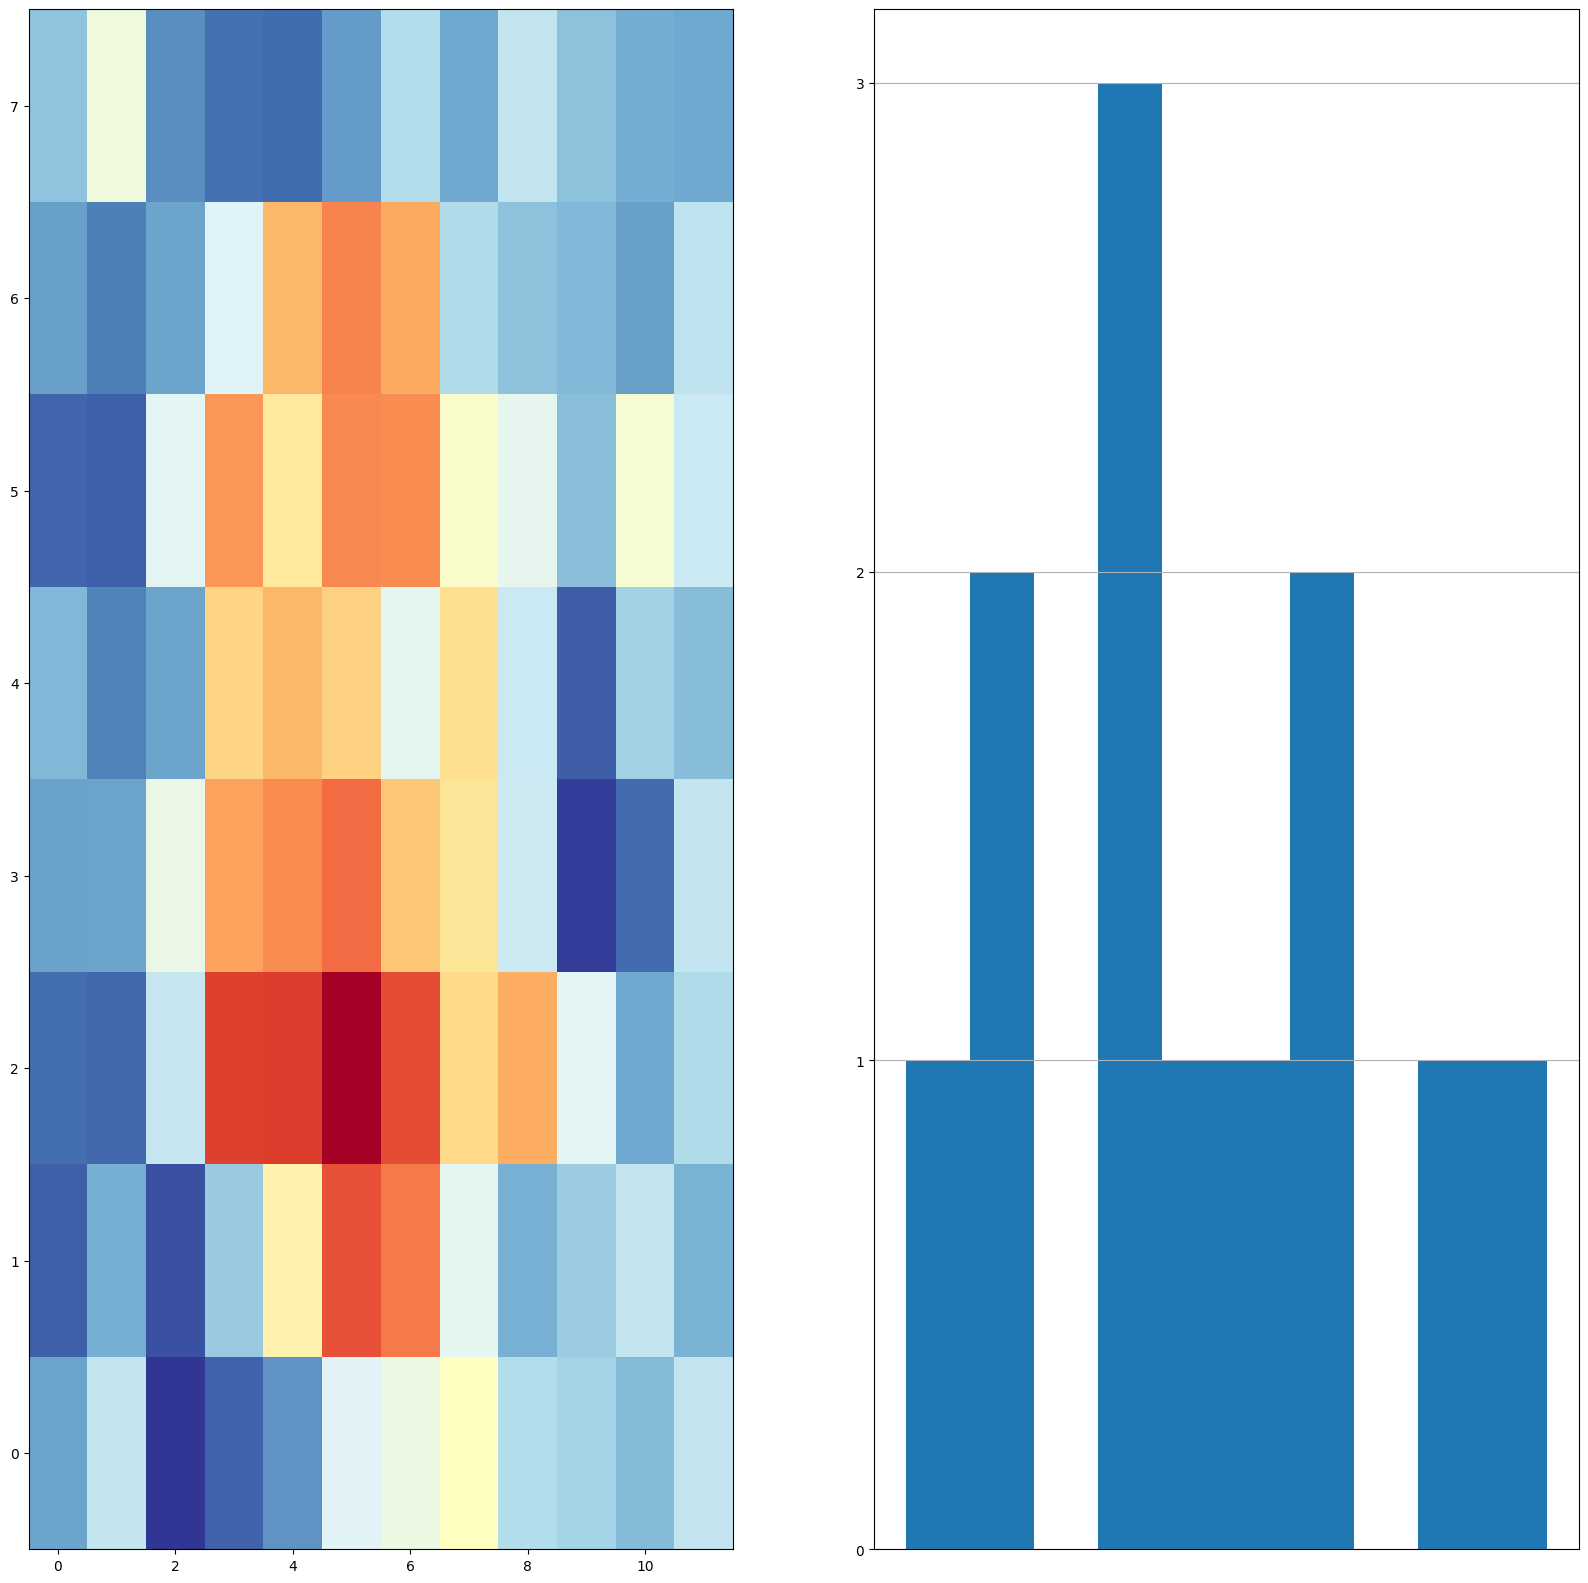

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 12:-50]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Right histogram
ax[1].hist(w_markers_cropped[0], bins=10)
# # Lower scatterplot
# _axis = 0 # 0 - keeps x; 1 - keeps y
# w_markers_summed = -w_markers_cropped.sum(axis=_axis)
# x_markers_summed = np.arange(len(w_markers_summed))
# ax[1].hist(w_markers_summed)
# ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
plt.grid()
plt.show()

### Histogram of one y-bin

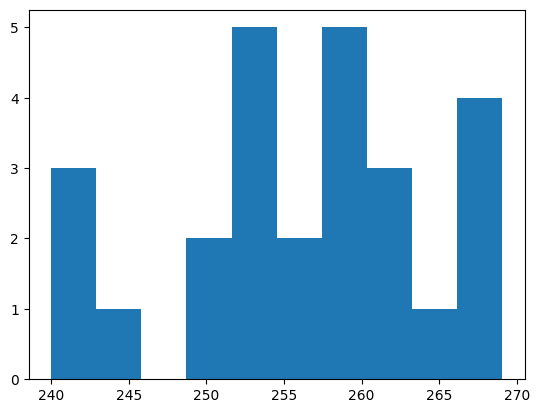

[[255.67865 253.35094 252.50774 252.2294  248.81255 253.00484 258.93314
  258.45682 262.32913 260.06683 242.27892 240.00514 242.08543 250.6481
  243.35213 252.9303  264.90198 256.11218 257.93744 260.6252  268.05835
  267.65356 268.00836 269.03854 261.87976 260.21194]]


In [32]:
w_onebin = w_markers[35:36, 5:-43]
x_onebin = range(w_onebin.shape[1])     # Columns   (_, this)
y_onebin = range(w_onebin.shape[0])     # Rows      (this, _)
plt.hist(w_onebin[0])
plt.show()
print(w_onebin)

ValueError: not enough values to unpack (expected 2, got 1)

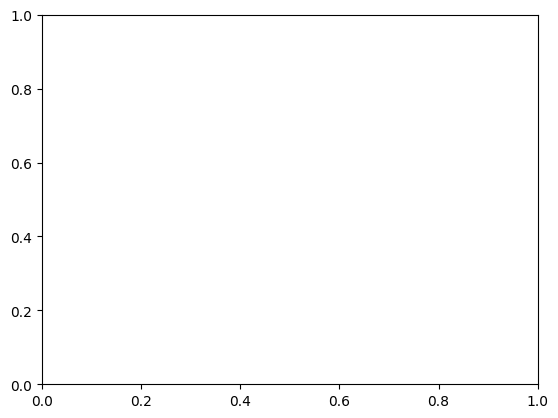

In [27]:
w_onebin = w_markers[35:36, 5:-43]
x_onebin = range(w_onebin.shape[1])     # Columns   (_, this)
y_onebin = range(w_onebin.shape[0])     # Rows      (this, _)
  
plt.pcolormesh(x_onebin, y_onebin, w_onebin, cmap="RdYlBu")
plt.xticks(x_onebin, rotation=90)
plt.yticks(y_onebin)
plt.show()
print(w_onebin[0])

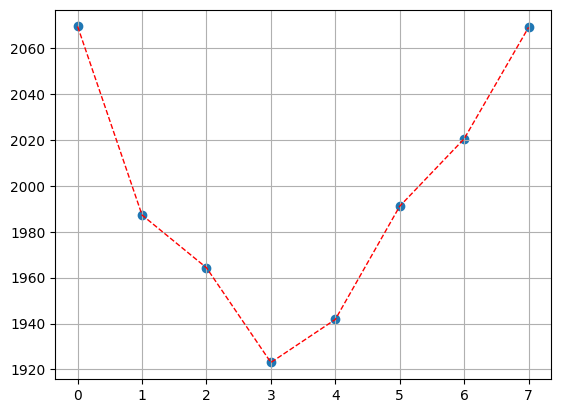

In [100]:
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 14:-52]
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
plt.scatter(x_markers_summed, w_markers_summed)
plt.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
plt.xticks(x_markers_summed)
plt.grid()
plt.show()

[  10.6344728   -71.31675575 2059.32557678]


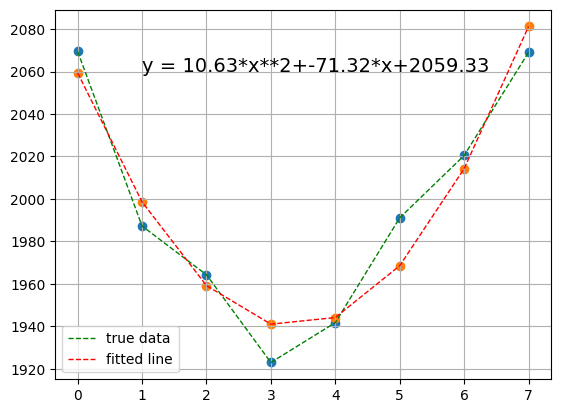

In [101]:
#define data
x = x_markers_summed
y = w_markers_summed
x = np.arange(len(y))
#find line of best fit
z = np.polyfit(x, y, 2, full=False, cov=False)

#add points to plot
plt.scatter(x, y)
plt.plot(x, y, '--', lw=1, c='green', label='true data')
print(z)
#add line of best fit to plot
# plt.plot(x, a*x+b) 
y_pred = z[0]*x**2+z[1]*x+z[-1]
plt.scatter(x, y_pred)
plt.plot(x, y_pred, '--', lw=1, c='r', label='fitted line')
plt.text(1, 2060, f'y = {z[0]:.2f}*x**2+{z[1]:.2f}*x+{z[-1]:.2f}', size=14)
plt.legend()
plt.grid()
plt.show()

In [84]:
import matplotlib.pyplot as plt
from scipy import odr
x = np.linspace(0.0, 5.0)
y = np.sin(x)
poly_model = odr.polynomial(3)  # using third order polynomial model
data = odr.Data(x, y)
odr_obj = odr.ODR(data, poly_model)
output = odr_obj.run()  # running ODR fitting
poly = np.poly1d(output.beta[::-1])
poly_y = poly(x)
plt.plot(x, y, label="input data")
plt.plot(x, poly_y, label="polynomial ODR")
plt.legend()
plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

(array([1., 1., 1., 1., 1., 1., 0., 0., 3., 2.]),
 array([1923.05102539, 1939.68286133, 1956.31481934, 1972.94665527,
        1989.57861328, 2006.21044922, 2022.84228516, 2039.47424316,
        2056.10620117, 2072.73803711, 2089.36987305]),
 <BarContainer object of 10 artists>)

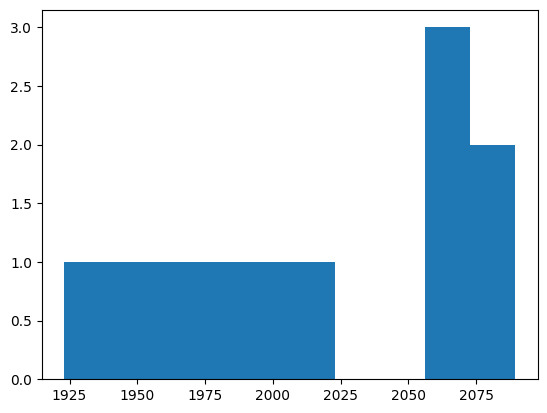

In [58]:
plt.hist(w_markers_summed)

## Fitting

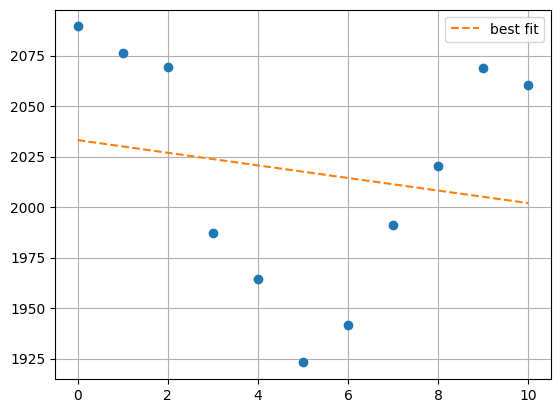

In [57]:
from lmfit.models import Model, GaussianModel
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

# def line(x, slope, intercept):
#     """a line"""
#     return slope*x + intercept

mod  = GaussianModel(prefix='g1_')
pars = mod.guess(w_markers_summed, x=x_markers_summed)
# pars = mod.make_params(amp=1925, cen=5, wid=5)

result = mod.fit(w_markers_summed, pars, x=x_markers_summed)

plt.plot(x_markers_summed, w_markers_summed, 'o')
# plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
plt.plot(x_markers_summed, result.best_fit, '--', label='best fit')
plt.legend()
plt.grid()
plt.show()

In [55]:
comps = result.eval_components(x=x_markers_summed)
comps

{'gaussian': array([2033.13269846, 2029.9940474 , 2026.85979397, 2023.72993277,
        2020.6044584 , 2017.48336546, 2014.36664858, 2011.25430235,
        2008.1463214 , 2005.04270036, 2001.94343386])}

In [57]:
ress = comps['gaussian']
ress

array([2033.13269846, 2029.9940474 , 2026.85979397, 2023.72993277,
       2020.6044584 , 2017.48336546, 2014.36664858, 2011.25430235,
       2008.1463214 , 2005.04270036, 2001.94343386])

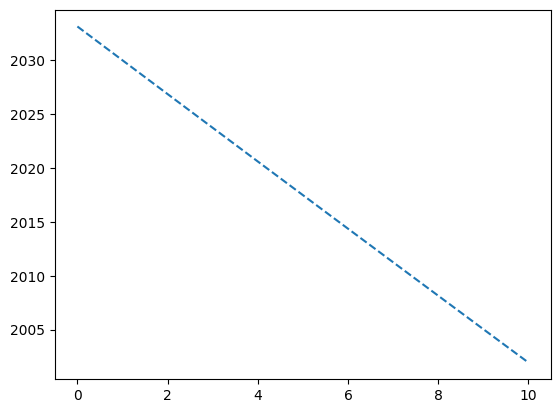

In [58]:
comps = result.eval_components(x=x)
# plt.plot(x, y)
plt.plot(x_markers_summed, ress, '--', label='gaussian')

### Scipy

In [42]:
from scipy.optimize import curve_fit

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))
# guess = []
parameters, covariance = curve_fit(gaussian, x_markers_summed, w_markers_summed, p0=[-1925, 12, 4], maxfev=1000)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [39]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

-4073651396.1115546
-7618.595809278799


/tmp/ipykernel_2347/3302932963.py:4: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


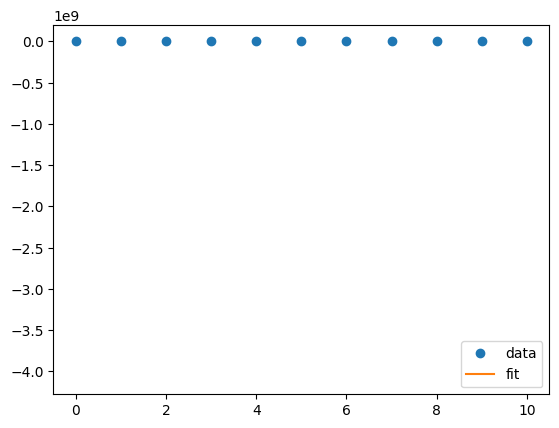

In [40]:
fit_y = Gauss(x_markers_summed, fit_A, fit_B)
plt.plot(x_markers_summed, w_markers_summed, 'o', label='data')
plt.plot(x_markers_summed, fit_y, '-', label='fit')
plt.legend()

In [ ]:
from lmfit.models import ExponentialModel, GaussianModel, VoigtModel

# Exponent
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)


# Gauss

voigt1 = VoigtModel(prefix='v1_')
pars.update(voigt1.make_params())

pars['v1_center'].set(value=3, min=1, max=5)
pars['v1_sigma'].set(value=0.1, min=0.05)
pars['v1_amplitude'].set(value=623, min=200)

voigt2 = VoigtModel(prefix='v2_')
pars.update(voigt2.make_params())

pars['v2_center'].set(value=16, min=16, max=18)
pars['v2_sigma'].set(value=0.1, min=0.05)
pars['v2_amplitude'].set(value=623, min=200)

voigt3 = VoigtModel(prefix='v3_')
pars.update(voigt3.make_params())

pars['v3_center'].set(value=28, min=25, max=30)
pars['v3_sigma'].set(value=0.1, min=0.05)
pars['v3_amplitude'].set(value=623, min=200)

mod = voigt1+voigt2+voigt3 + exp_mod
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)